*   Nama Lengkap : Adisaputra Zidha Noorizki
*   Username : hi_zidha
*   Email : hi.zidha@gmail.com

In [ ]:
import pandas as pd
import tensorflow as tf
import nltk

from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IDCamp2023/Intermediate/dataset/ecommerceDataset.csv',
                 header=None, names=['catg', 'description'])
df

,catg,description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...
...,...,...
50420,Electronics,Strontium MicroSD Class 10 8GB Memory Card (Bl...
50421,Electronics,CrossBeats Wave Waterproof Bluetooth Wireless ...
50422,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...
50423,Electronics,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou..."


In [ ]:
# Mengambil 5000 data secara rata untuk setiap category
selectedData = []
uniqueCategories = df['catg'].unique()
dataCategory = 5000 // len(uniqueCategories)

for category in uniqueCategories:
    category_data = df[df['catg'] == category].sample(dataCategory, random_state=42)
    selectedData.append(category_data)

df = pd.concat(selectedData)
df

,catg,description
12340,Household,"Riedel VINUM Cognac Glasses, Set of 2 Size:Set..."
7144,Household,ANSIO Polyester Shower Curtain for Bathroom - ...
4400,Household,Little India Meenakari Work Lord Ganesh Marble...
9992,Household,PETRICE Triple Paper Dispenser | 4 in 1 Foil C...
16601,Household,KC Cab Copper PVC Insulated Wire 90 m Coil(Red...
...,...,...
49194,Electronics,Haavitek Universal Qi Certified Wireless Charg...
43237,Electronics,"Lenovo Tab M10 Tablet (10.1 inch, 32GB, Wi-Fi ..."
43510,Electronics,Dell KB216 Wired Multimedia USB Keyboard Wired...
42020,Electronics,"Abro ABS39 Colour Spray Paint (400ml, Glossy B..."


In [ ]:
totalData = df['catg'].value_counts()
print(totalData)

Household                 1250
Books                     1250
Clothing & Accessories    1250
Electronics               1250
Name: catg, dtype: int64


In [ ]:
category = pd.get_dummies(df.catg)
category.columns = category.columns.str.lower()

df_new = pd.concat([df, category], axis=1)
df_new = df_new.drop(columns='catg')
df_new

,description,books,clothing & accessories,electronics,household
12340,"Riedel VINUM Cognac Glasses, Set of 2 Size:Set...",0,0,0,1
7144,ANSIO Polyester Shower Curtain for Bathroom - ...,0,0,0,1
4400,Little India Meenakari Work Lord Ganesh Marble...,0,0,0,1
9992,PETRICE Triple Paper Dispenser | 4 in 1 Foil C...,0,0,0,1
16601,KC Cab Copper PVC Insulated Wire 90 m Coil(Red...,0,0,0,1
...,...,...,...,...,...
49194,Haavitek Universal Qi Certified Wireless Charg...,0,0,1,0
43237,"Lenovo Tab M10 Tablet (10.1 inch, 32GB, Wi-Fi ...",0,0,1,0
43510,Dell KB216 Wired Multimedia USB Keyboard Wired...,0,0,1,0
42020,"Abro ABS39 Colour Spray Paint (400ml, Glossy B...",0,0,1,0


In [ ]:
description = df_new['description'].values
label = df_new[['books', 'clothing & accessories', 'electronics', 'household']].values

description_train, description_val, label_train, label_val = train_test_split(description, label, test_size=0.2)

In [ ]:
def preprocess_text(text):
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    words = tokenizer.tokenize(text)
    return ' '.join(words)

In [ ]:
tokenizer = Tokenizer(num_words=2160, oov_token='<oov>')

# Data training
description_train = [preprocess_text(text) for text in description_train]
tokenizer.fit_on_texts(description_train)
sequences_train = tokenizer.texts_to_sequences(description_train)
padded_train = pad_sequences(sequences_train, padding='post', truncating='post', maxlen=64)

# Data validation
description_val = [preprocess_text(text) for text in description_val]
sequences_val = tokenizer.texts_to_sequences(description_val)
padded_val = pad_sequences(sequences_val, padding='post', truncating='post', maxlen=64)

In [ ]:
model = Sequential([
    Embedding(input_dim=2160, output_dim=16, input_length=64),
    LSTM(64, dropout=0.2),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
num_epochs = 25

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 64, 16)            34560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                20736     
                                                                 
 dense_4 (Dense)             (None, 256)               16640     
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 4)                 260       
                                                                 
Total params: 113348 (442.77 KB)
Trainable params: 113

In [ ]:
history = model.fit(padded_train, label_train, epochs=num_epochs, validation_data=(padded_val, label_val), verbose=2)

Epoch 1/25
125/125 - 17s - loss: 1.2157 - accuracy: 0.3938 - val_loss: 0.7262 - val_accuracy: 0.7060 - 17s/epoch - 134ms/step
Epoch 2/25
125/125 - 6s - loss: 0.5983 - accuracy: 0.7552 - val_loss: 0.3850 - val_accuracy: 0.8600 - 6s/epoch - 47ms/step
Epoch 3/25
125/125 - 3s - loss: 0.3528 - accuracy: 0.8947 - val_loss: 0.3156 - val_accuracy: 0.8900 - 3s/epoch - 27ms/step
Epoch 4/25
125/125 - 3s - loss: 0.2366 - accuracy: 0.9333 - val_loss: 0.3771 - val_accuracy: 0.8830 - 3s/epoch - 27ms/step
Epoch 5/25
125/125 - 4s - loss: 0.1982 - accuracy: 0.9467 - val_loss: 0.3690 - val_accuracy: 0.9000 - 4s/epoch - 31ms/step
Epoch 6/25
125/125 - 6s - loss: 0.2383 - accuracy: 0.9370 - val_loss: 0.7435 - val_accuracy: 0.7560 - 6s/epoch - 47ms/step
Epoch 7/25
125/125 - 4s - loss: 0.2603 - accuracy: 0.9337 - val_loss: 0.3427 - val_accuracy: 0.9050 - 4s/epoch - 29ms/step
Epoch 8/25
125/125 - 4s - loss: 0.1542 - accuracy: 0.9645 - val_loss: 0.3981 - val_accuracy: 0.9100 - 4s/epoch - 30ms/step
Epoch 9/25
12

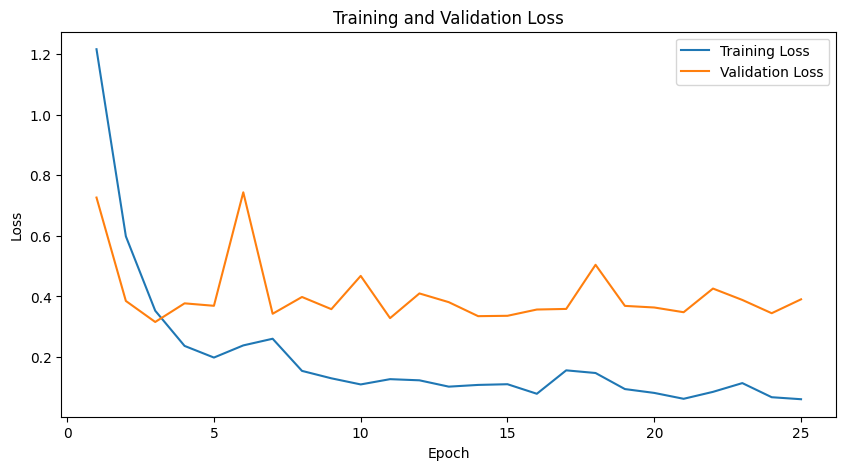

In [ ]:
import matplotlib.pyplot as plt

# Plot loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

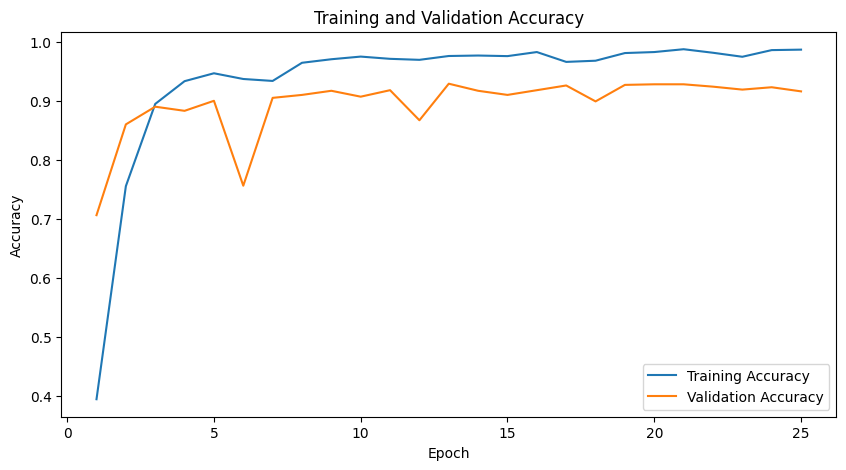

In [ ]:
# Plot Accuracy
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()